In [1]:
import pymc3 as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with pm.Model() as model:
    lambda_ = pm.Exponential("poisson_param", 1)
    data_generator = pm.Poisson("data_generator", lambda_)
    data_plus_one =data_generator + 1

In [3]:
# Not working because of api differences between pymc and pymc3
#print(f"Children of 'lambda_': {lambda_.children}")
#print(data_generator.parents)
#print(data_generator.children)

In [4]:
lambda_.model

In [5]:
lambda_??

Type:            TransformedRV
String form:     poisson_param
File:            /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py
Source:         
class TransformedRV(TensorVariable):

    def __init__(self, type=None, owner=None, index=None, name=None,
                 distribution=None, model=None, transform=None,
                 total_size=None):
        """
        Parameters
        ----------

        type : theano type (optional)
        owner : theano owner (optional)
        name : str
        distribution : Distribution
        model : Model
        total_size : scalar Tensor (optional)
            needed for upscaling logp
        """
        if type is None:
            type = distribution.type
        super(TransformedRV, self).__init__(type, owner, index, name)

        self.transformation = transform

        if distribution is not None:
            self.model = model
            self.distribution = distribution

            tra

In [7]:
data_generator

data_generator

In [8]:
# Frustrating.  The book is all pymc2 and it seems the api has changed dramatically


In [9]:
with pm.Model() as stochastic_model:
    some_variable = pm.DiscreteUniform("discrete_uni_var", 0,4)
    beta_1 = pm.Uniform("beta_1", 0, 1)
    beta_2 = pm.Uniform("beta_2", 0, 1)
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 1)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)
    print(lambda_1.random())
    print(lambda_2.random())
    print(tau.random())

1.1167090686999999
2.0602133513220653
5


In [10]:
n_data_points = 5
idx = np.arange(n_data_points)
with stochastic_model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [11]:
# theano
import theano.tensor as tt

In [12]:
with pm.Model() as theano_test:
    p1 = pm.Uniform("p", 0 , 1)
    p2 = 1 - p1
    p = tt.stack([p1, p2])
    
    assignment = pm.Categorical("assignment", p)

In [13]:
# Use observations in the models

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


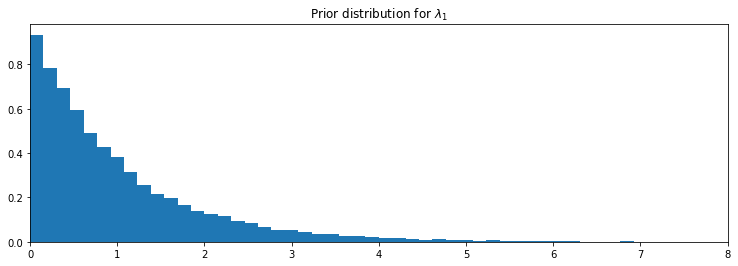

In [14]:
figsize(12.5, 4)
samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [15]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson("fxd", 1, observed=data)
    print(f"value: {fixed_variable.tag.test_value}")

value: [10  5]


In [16]:
data = np.array([10, 25, 15, 20, 35])
with model:
    obs = pm.Poisson("obs", lambda_, observed=data)
    print(obs.tag.test_value)

[10 25 15 20 35]


In [17]:
tau = np.random.randint(0, 80)
tau

2

In [18]:
alpha = 1/20
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
print(lambda_1, lambda_2)

3.4308358257640714 19.123512778648205


In [19]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80 - tau)]

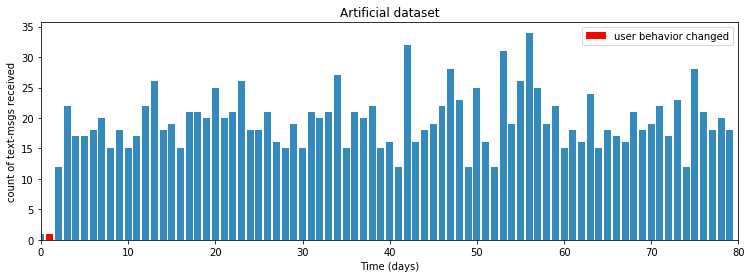

In [20]:
# plot artificial dataset
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau-1], color="r", label="user behavior changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80),
plt.legend()

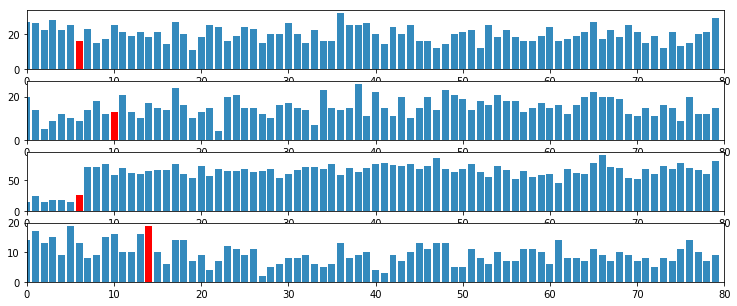

In [21]:
def plot_artificial_sms_dataset():
    tau = stats.randint.rvs(0, 80)
    alpha = 1/20
    lambda_1, lambda_2 = stats.expon.rvs(scale=1/alpha, size=2)
    data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80 - tau)]
    plt.bar(np.arange(80), data, color='#348ABD')
    plt.bar(tau-1, data[tau-1], color='r', label="user behavior changed")
    plt.xlim(0, 80)
    
figsize(12.5, 5)
plt.title("More examples of artificial datasets")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_sms_dataset()

In [22]:
# A simple case

with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

In [23]:
# set constants
p_true = .05  # remember that this is unknown
N = 1500

# sample N Bernoulli random variables from Ber(0.05)
# each random variable has a .05 chance of being a 1
# this is the data generation step
occurrences = stats.bernoulli.rvs(p_true, size=N)

print(occurrences)
print(np.sum(occurrences))

[0 0 0 ... 0 0 0]
76


In [24]:
# occurences.mean is equal to n/N
print("what is the observed frequency in group A? %.4f" % np.mean(occurrences))
print("Does this equal the true frequency? %s" % (np.mean(occurrences) == p_true))

what is the observed frequency in group A? 0.0507
Does this equal the true frequency? False


In [25]:
with model:
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]
    

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p_interval__]
100%|██████████| 18500/18500 [00:02<00:00, 6702.60it/s]
The number of effective samples is smaller than 25% for some parameters.


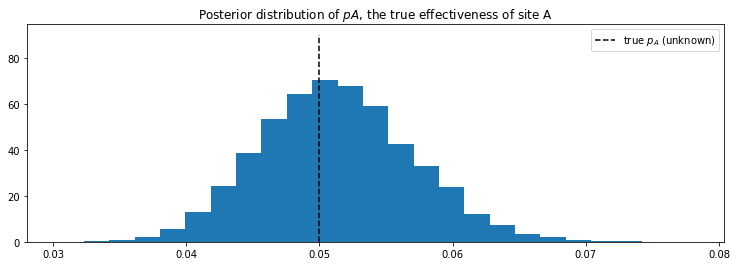

In [26]:
figsize(12.5, 4)
plt.title("Posterior distribution of $pA$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(burned_trace["p"], bins=25, histtype='stepfilled', density=True)
plt.legend();

In [27]:
# A and B together
figsize = (12, 4)

# these two quantites are unknown to us
true_p_A = 0.05
true_p_B = 0.04

# Notice the unequal sample sizes -- no prblem in Bayesian analysis
N_A = 1500
N_B = 750

# generate some observations
observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from site A: ", observations_A[:30], "...")
print("Obs from site B: ", observations_B[:30], "...")


Obs from site A:  [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


In [28]:
print(np.mean(observations_A))
print(np.mean(observations_B))

0.046
0.03333333333333333


In [29]:
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)
    
    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_B_interval__]
>Metropolis: [p_A_interval__]
100%|██████████| 20500/20500 [00:06<00:00, 3092.73it/s]
The number of effective samples is smaller than 25% for some parameters.


In [30]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

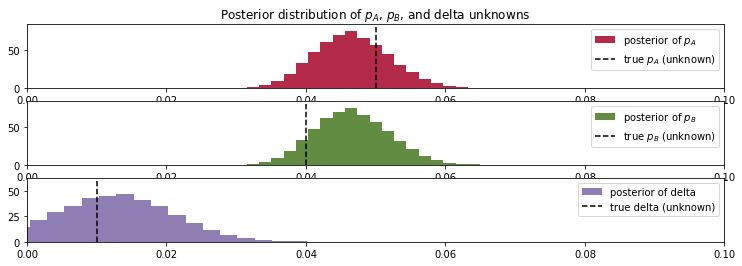

In [31]:
#figsize(12.5, 10)

# plot hists of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25,
         alpha=.85, label="posterior of $p_A$",
         color="#A60628", density=True)
plt.vlines(true_p_A, 0, 80, linestyle='--', label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distribution of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25,
         alpha=.85, label="posterior of $p_B$",
         color="#467821", density=True)
plt.vlines(true_p_B, 0, 80, linestyle='--', label="true $p_B$ (unknown)")
plt.legend(loc="upper right")


ax = plt.subplot(313)

plt.xlim(0, .1)
plt.hist(delta_samples, histtype='stepfilled', bins=30,
         alpha=.85, label="posterior of delta",
         color="#7A68A6", density=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=.2)
plt.legend(loc="upper right")


In [32]:
# count the number of samples less than zero, ie the area under the curve
# before 0, represent the prob that site A is worse than site B

print("probability site A is worse than site B: %.3f" % np.mean(delta_samples < 0))
print("probability site A is better than site B: %.3f" % np.mean(delta_samples > 0))

probability site A is worse than site B: 0.083
probability site A is better than site B: 0.917


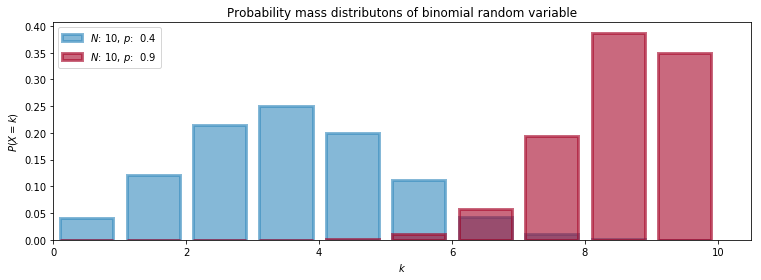

In [33]:
figsize = (12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
           edgecolor=colors[i],
           alpha=.6,
           label="$N$: %d, $p$: % .1f" % (N, p),
           linewidth=3)
    plt.legend(loc="upper left")
    plt.xlim(0, 10.5)
    plt.xlabel("$k$")
    plt.ylabel("$P(X = k)$")
    plt.title("Probability mass distributons of binomial random variable");

In [34]:
# privacy algo

N = 100
with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)
    true_answers = pm.Bernoulli("truths", p, shape=N, testval=np.random.binomial(1, .5, N))
    first_coin_flips = pm.Bernoulli("first_flips", .5, shape=N, testval=np.random.binomial(1, .5, N))
    
print(first_coin_flips.tag.test_value)

[1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0]


In [35]:
with model:
    second_coin_flips = pm.Bernoulli("second_coin_flips", .5, shape=N, testval=np.random.binomial(1, .5, N))

In [36]:
with model:
    val = first_coin_flips * true_answers + (1 - first_coin_flips) * second_coin_flips
    observed_proportion = pm.Deterministic("observed_proportion", tt.sum(val)/float(N))

In [37]:
observed_proportion.tag.test_value

array(0.47)

In [38]:
X = 35

with model:
    observations = pm.Binomial("obs", N, observed_proportion, observed=X)
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(40000, step=step)
    burned_trace = trace[15000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [freq_cheating_interval__]
>BinaryGibbsMetropolis: [truths, first_flips, second_coin_flips]
100%|██████████| 40500/40500 [22:27<00:00, 30.05it/s]
The number of effective samples is smaller than 10% for some parameters.


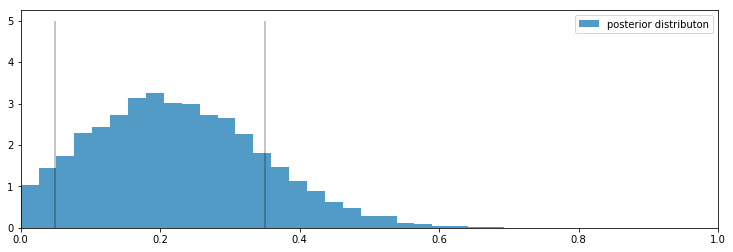

In [39]:
figsize = (12.5, 3)
p_trace = burned_trace["freq_cheating"][15000:]
plt.hist(p_trace, histtype="stepfilled", density=True, alpha=.85, bins=30,
        label="posterior distributon", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=.3)
plt.xlim(0, 1)
plt.legend();

In [40]:
# Alternative pymc3 Model

with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", .5 * p + .25)
    yes_responses = pm.Binomial("number_cheaters", 100, p_skewed, observed=35)


In [41]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(25000, step=step)
    burned_trace = trace[2500:]
    

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [freq_cheating_interval__]
100%|██████████| 25500/25500 [00:03<00:00, 7499.14it/s]
The number of effective samples is smaller than 25% for some parameters.


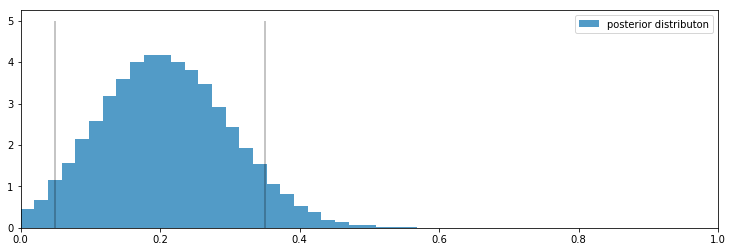

In [42]:
p_trace = burned_trace["freq_cheating"]
plt.hist(p_trace, histtype="stepfilled", density=True, alpha=.85, bins=30,
        label="posterior distributon", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=.3)
plt.xlim(0, 1)
plt.legend();

In [43]:
# More PyMC3 Tricks

# arrays of PyMC3 variables

N = 10
x = np.ones(N, dtype=object)
with pm.Model() as model:
    for i in range(N):
        x[i] = pm.Exponential('x_%i' % i, (i + 1.0) ** 2)

In [44]:
figsize = (12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)

In [61]:
challenger_data =[[ 66.,   0.],
 [ 70.,   1.],
 [ 69.,   0.],
 [ 68.,   0.],
 [ 67.,   0.],
 [ 72.,   0.],
 [ 73.,   0.],
 [ 70.,   0.],
 [ 57.,   1.],
 [ 63.,   1.],
 [ 70.,   1.],
 [ 78.,   0.],
 [ 67.,   0.],
 [ 53.,   1.],
 [ 67.,   0.],
 [ 75.,   0.],
 [ 70.,   0.],
 [ 81.,   0.],
 [ 76.,   0.],
 [ 79.,   0.],
 [ 75.,   1.],
 [ 76.,   0.],
 [ 58.,   1.]]

import pandas as pd
df = pd.DataFrame(challenger_data, columns=["Temp (F)", "O-Ring failure?"])


In [62]:
df.head()

,Temp (F),O-Ring failure?
0,66.0,0.0
1,70.0,1.0
2,69.0,0.0
3,68.0,0.0
4,67.0,0.0


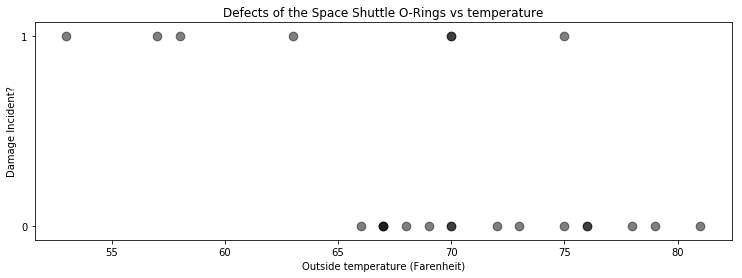

In [63]:
plt.scatter(df['Temp (F)'], df['O-Ring failure?'], s=75,
           color="k", alpha=.5)
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside temperature (Farenheit)")
plt.title("Defects of the Space Shuttle O-Rings vs temperature");

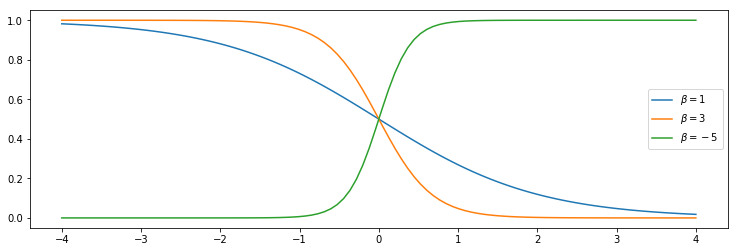

In [64]:
figsize = (12, 3)

def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

x = np.linspace(-4, 4, 100)
plt.plot(x, logistic(x, 1), label=r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$")
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$")
plt.legend();

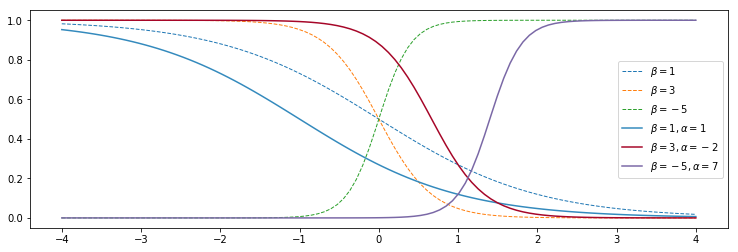

In [65]:
figsize = (12, 3)

def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw=1)
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw=1)
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$", ls="--", lw=1)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha = 1$", color="#348ABD")
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha = -2$", color="#A60628")
plt.plot(x, logistic(x, -5, 7), label=r"$\beta = -5, \alpha = 7$", color="#7A68A6")


plt.legend(loc="best");

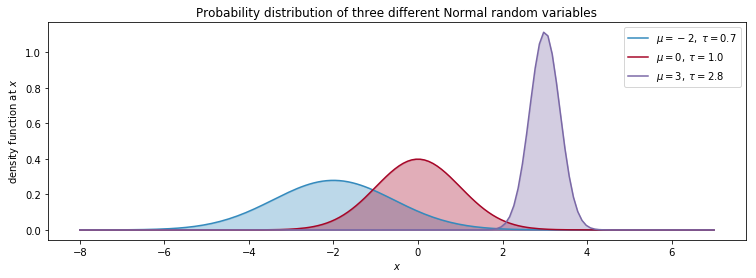

In [66]:
nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, tau, colors)

for _mu, _tau, _color in parameters:
    plt.plot(x, nor.pdf(x, _mu, scale=1./_tau),
            label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1./_tau), color=_color, alpha=.33)
    
plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title("Probability distribution of three different Normal random \
variables");

In [69]:
temperature, D = zip(*challenger_data)

In [70]:
with pm.Model() as model:
    beta = pm.Normal("beta", mu=0, tau=.001, testval=0)
    alpha = pm.Normal("alpha", mu=0, tau=.001, testval=0)
    p = pm.Deterministic("P", 1.0/(1 + tt.exp(beta*temperature + alpha)))

In [73]:
with model:
    observed = pm.Bernoulli("bernoulli_obs1", p, observed=D)
    
    # Mysterious code to be explained in Chapter 3
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(120000, step=step, start=start)
    burned_trace = trace[100000::2]

logp = -39.374, ||grad|| = 33.67: 100%|██████████| 27/27 [00:00<00:00, 2323.33it/s]  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
100%|██████████| 120500/120500 [00:38<00:00, 3163.89it/s]
The number of effective samples is smaller than 10% for some parameters.


In [77]:
alpha_samples = burned_trace["alpha"][:, None]
beta_samples = burned_trace["beta"][:, None]

In [78]:


figsize = (12.5, 6)
plt.subplot(211)
plt.title("Posterior distrubtion of the variables $\alpha, \beta$")
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=.085,
        label=r"posterior of $\beta$", color="#7A68A6", density=True)
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=.85,
        label=r"posterior of $\alpha", color="#A60628", density=True)
plt.legend();


ValueError: 
Posterior distrubtion of the variables $lpha, eta$
                                       ^
Expected end of text (at char 39), (line:1, col:40)

<Figure size 900x288 with 2 Axes>

In [79]:
t = np.linspace(temperature.min() -5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)

mean_prob_t = p_t.mean(axis=0)

AttributeError: 'tuple' object has no attribute 'min'

In [ ]:
figsize = (12.5, 4)

plt.plot(t, mean_prob_t, lw=3, label="average posterior \nprobability \)of defect")
plt.plot(t, p_t[0, :], ls="--", label='realization from posterior')
plt.plot(t, p_t[-2,:], ls="--", label='realization from posterior')
plt.scatter(temperatire, D, color='k', s=50, alpha=.5)
plt.title("Posterior expected value of probability of defect; plus realizations")
plt.legend(loc="best")
plt.ylim(-.1, 1.1)
plt.xlim(t.min(), t.max())
plt.ylabel("probability")
plt.xlabel("temperature")

In [ ]:
from scipy.stats import mquantiles

qs = mquantiles(p_t, [.025, .975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=.7, color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
        label="average posterior \nprobability of defect")

plt.xlim(t.min(), t.max())
plt.ylim(-.02, 1.02)
plt.legend(loc="best")
plt.scatter(temperature, D, color="k", s=50, alpha=.5)
plt.xlabel("temp, $t$")

plt.ylabel("probability estimate")
plt.title("posterior probability estimates given temp. $t$");

In [ ]:
figsize = (12.5, 2.5)

prob_31 = logistic(31, beta_samples, alpha_samples)

plt.xlim(.995, 1)
plt.hist(prob_31, bins=1000, density=True, histtype='stepfilled')
plt.title("Posterior distribution of probability of defect given $t = 31$")
plt.xlabel("probability of defect occurring/ in O-ring");

In [ ]:
N = 100000
with pm.Model as model:
    beta = pm.Normal("beta", mu=0, tau=.001, testval=0)
    alpha = pm.Normal("alpha", mu=0, tau=.001, testval=0)
    p = pm.Deterministic("p", 1.0/(1. + tt.exp(beta * temperature + alpha)))
    observed = pm.Bernoulli("bernoulli_sim", p, shape=p.tag.test_value.shape)
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(N, step-step)

In [ ]:
figsize = (12.5, 5)

simulations = trace['bernoulli_sim']
print(simulations.shape)

plt.title("Simulated dataset using posterior parameters")
for i in range(4):
    ax = plt.subplot(4, 1, i+1)
    plt.scatter(temperature, simulations[1000*i, :], color='k', s=50, alpha=.6)